In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Import

In [7]:
df = pd.read_csv("/content/drive/MyDrive/City of Boston: Permitting D/Project Files/data/cleaned_abp.csv")
df.head()

,object_id,permitnumber,worktype,permittypedescr,description,comments,declared_valuation,total_fees,issued_date,expiration_date,...,property_id,parcel_id,lat,long,issued_year,issued_month,issued_day,expiration_year,expiration_month,expiration_day
0,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,36500.00,390.0,2021-01-28,2021-07-28,...,130392.0,3.038070e+08,42.359190,-71.052924,2021,1,28,2021.0,7.0,28.0
1,2,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,40000.00,429.0,2011-11-04,2012-05-04,...,17268.0,2.012032e+09,42.260750,-71.149611,2011,11,4,2012.0,5.0,4.0
2,3,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,5000.00,70.0,2020-06-01,NaN,...,113443.0,2.028370e+08,42.375243,-71.057585,2020,6,1,NaN,NaN,NaN
3,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,74295.75,803.0,2019-11-13,2020-05-13,...,129994.0,4.025580e+08,42.340600,-71.080251,2019,11,13,2020.0,5.0,13.0
4,5,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,15000.00,206.0,2013-01-03,2013-07-03,...,149852.0,2.204944e+09,42.344600,-71.154051,2013,1,3,2013.0,7.0,3.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622276 entries, 0 to 622275
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   object_id           622276 non-null  int64  
 1   permitnumber        622276 non-null  object 
 2   worktype            617722 non-null  object 
 3   permittypedescr     622276 non-null  object 
 4   description         617722 non-null  object 
 5   comments            622066 non-null  object 
 6   declared_valuation  622276 non-null  float64
 7   total_fees          622276 non-null  float64
 8   issued_date         622276 non-null  object 
 9   expiration_date     597182 non-null  object 
 10  status              622276 non-null  object 
 11  occupancytype       602785 non-null  object 
 12  sq_feet             622276 non-null  float64
 13  city                622062 non-null  object 
 14  zip                 621829 non-null  float64
 15  property_id         611587 non-nul

In [26]:
df['issued_year'] = df['issued_year'].astype(int)

In [54]:
worktype_year = df.groupby(['issued_year', 'worktype']).size().reset_index(name='counts')
top_5_per_year = worktype_year.groupby('issued_year').apply(lambda x: x.nlargest(5, 'counts')).reset_index(drop=True)

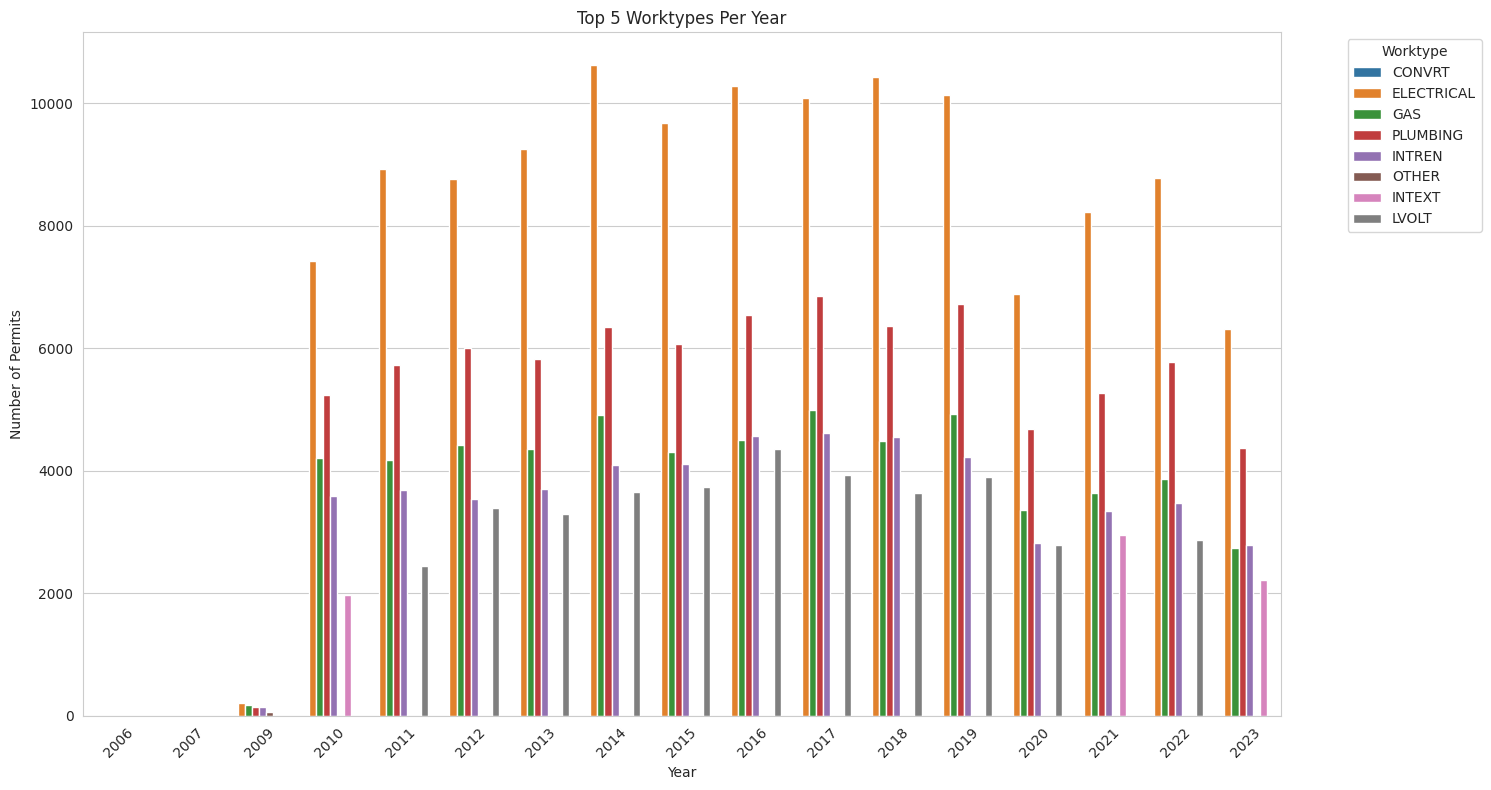

In [55]:
plt.figure(figsize=(15, 8))
sns.barplot(data=top_5_per_year, x='issued_year', y='counts', hue='worktype')
plt.title('Top 5 Worktypes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.legend(title='Worktype', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

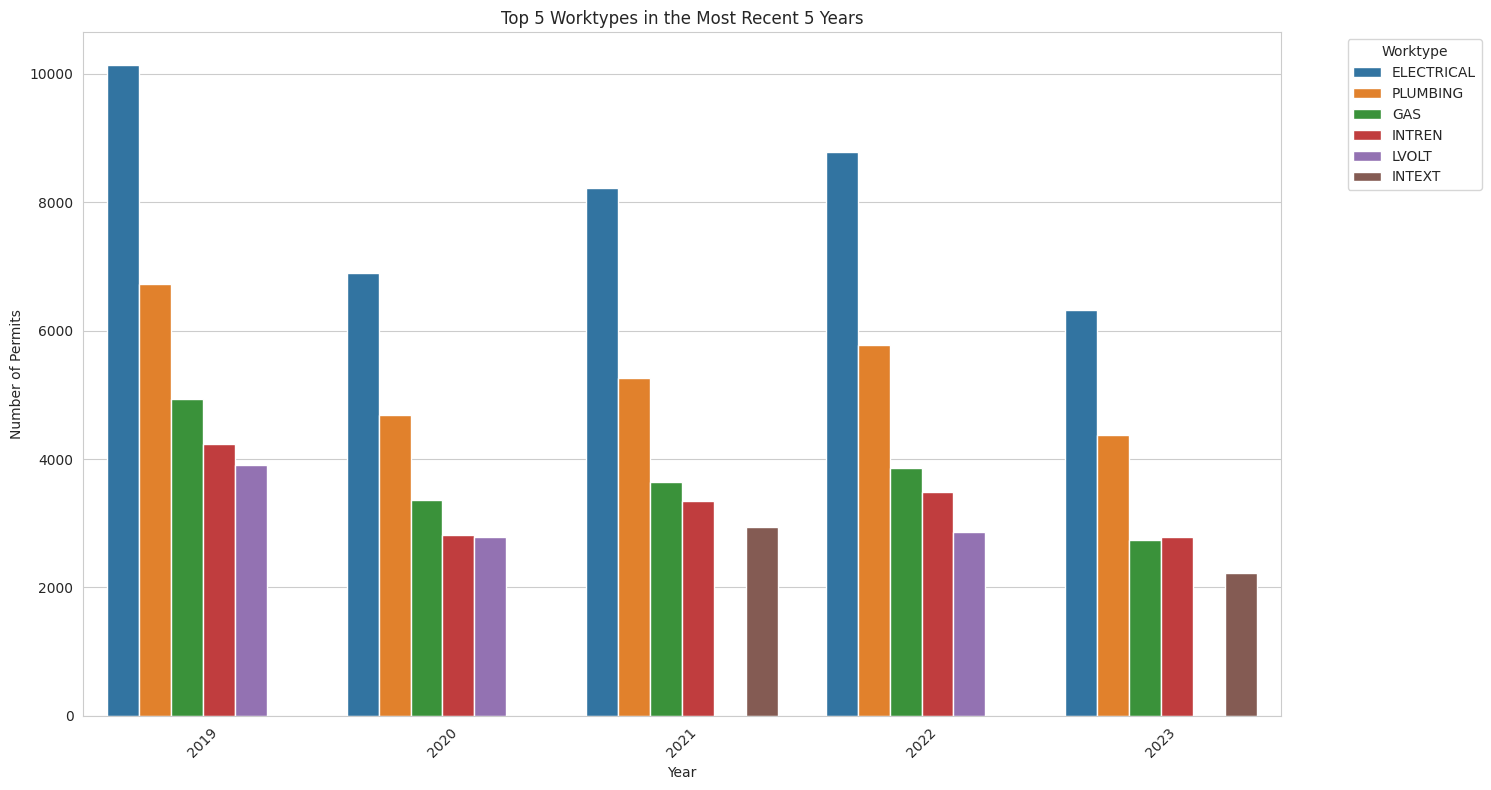

In [56]:

recent_5_years = df['issued_year'].unique()
recent_5_years.sort()
recent_5_years = recent_5_years[-5:]

filtered_top_5 = top_5_per_year[top_5_per_year['issued_year'].isin(recent_5_years)]

plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_top_5, x='issued_year', y='counts', hue='worktype')
plt.title('Top 5 Worktypes in the Most Recent 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.legend(title='Worktype', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


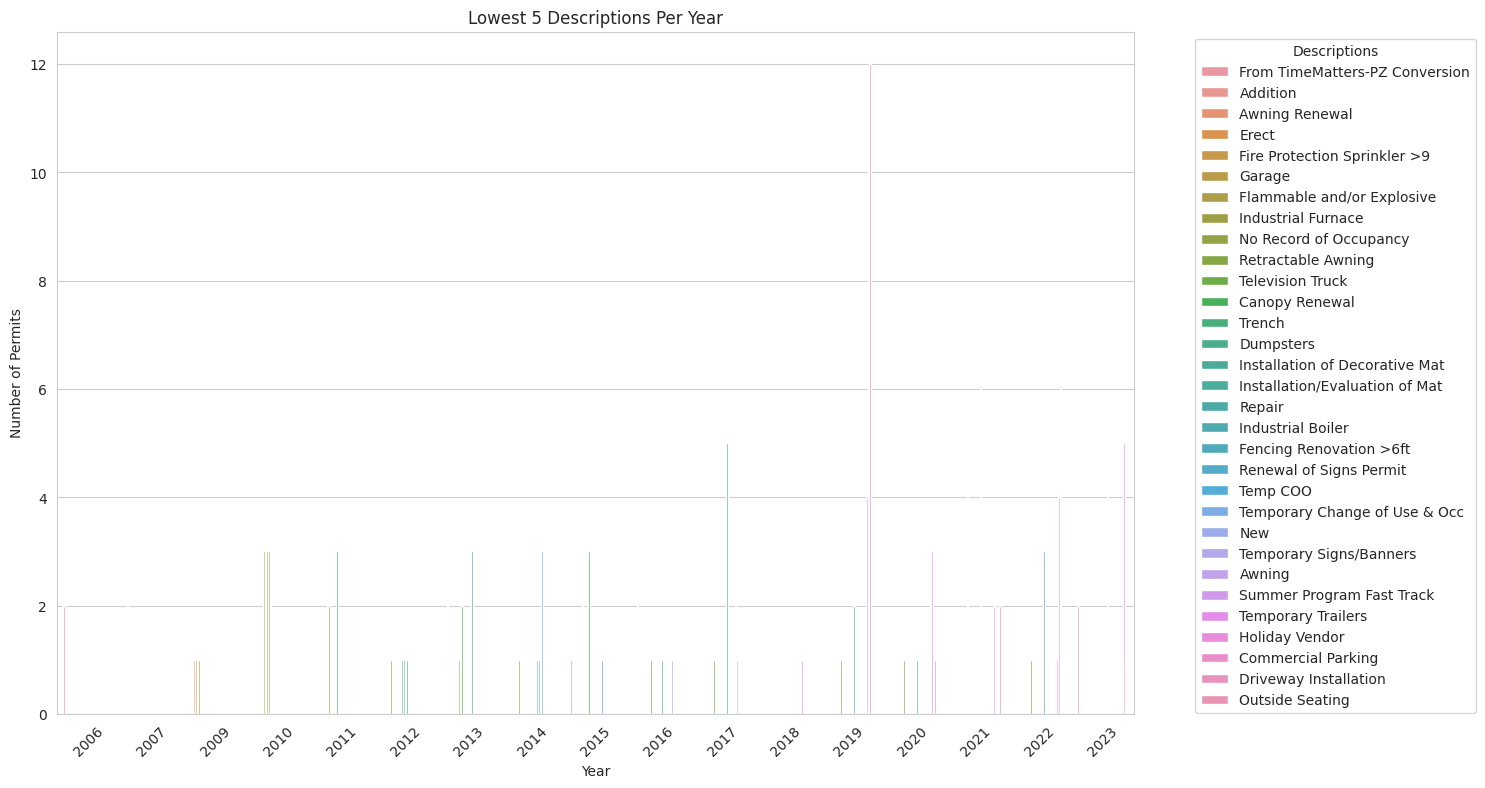

In [31]:
description_year = df.groupby(['issued_year', 'description']).size().reset_index(name='counts')
top_5_per_year = description_year.groupby('issued_year').apply(lambda x: x.nsmallest(5, 'counts')).reset_index(drop=True)

plt.figure(figsize=(15, 8))
sns.barplot(data=top_5_per_year, x='issued_year', y='counts', hue='description')
plt.title('Lowest 5 Descriptions Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.legend(title='Descriptions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

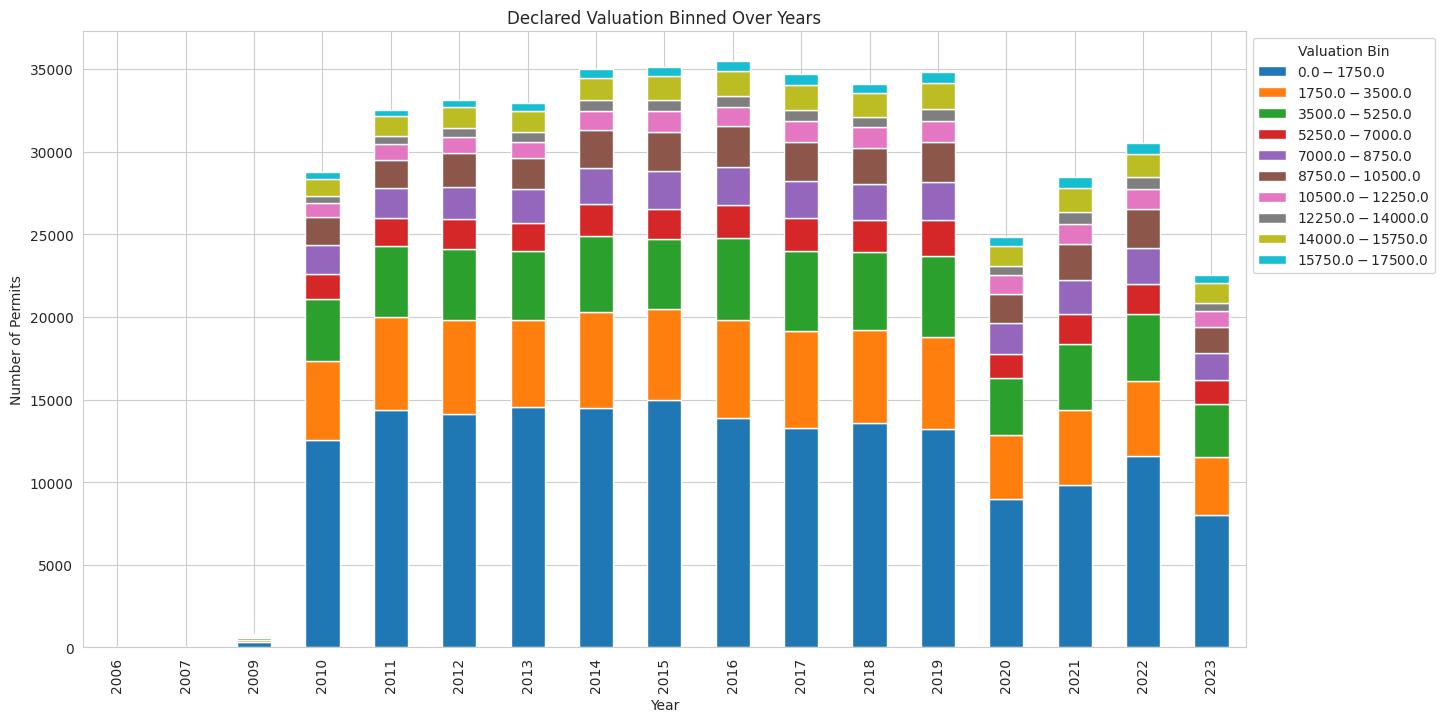

In [52]:
max_valuation = 17500

bin_size = max_valuation / 10
bins = np.linspace(0, max_valuation, 11)

bin_labels = [f'${bins[i]} - ${bins[i+1]}' for i in range(len(bins) - 1)]
df['valuation_bin'] = pd.cut(df['declared_valuation'], bins=bins, labels=bin_labels, right=False)

binned_data = df.groupby(['issued_year', 'valuation_bin']).size().reset_index(name='count')

pivot_data = binned_data.pivot(index='issued_year', columns='valuation_bin', values='count').fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Declared Valuation Binned Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.legend(title='Valuation Bin', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



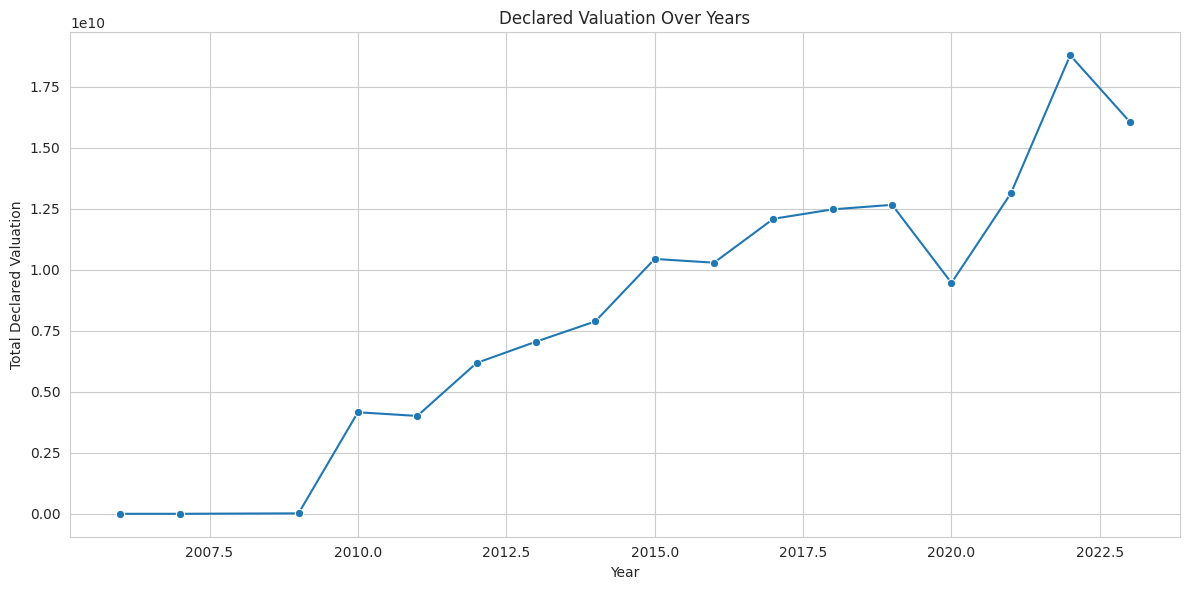

In [32]:
yearly_valuation = df.groupby('issued_year')['declared_valuation'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_valuation, x='issued_year', y='declared_valuation', marker='o')
plt.title('Declared Valuation Over Years')
plt.xlabel('Year')
plt.ylabel('Total Declared Valuation')
plt.grid(True)
plt.tight_layout()
plt.show()

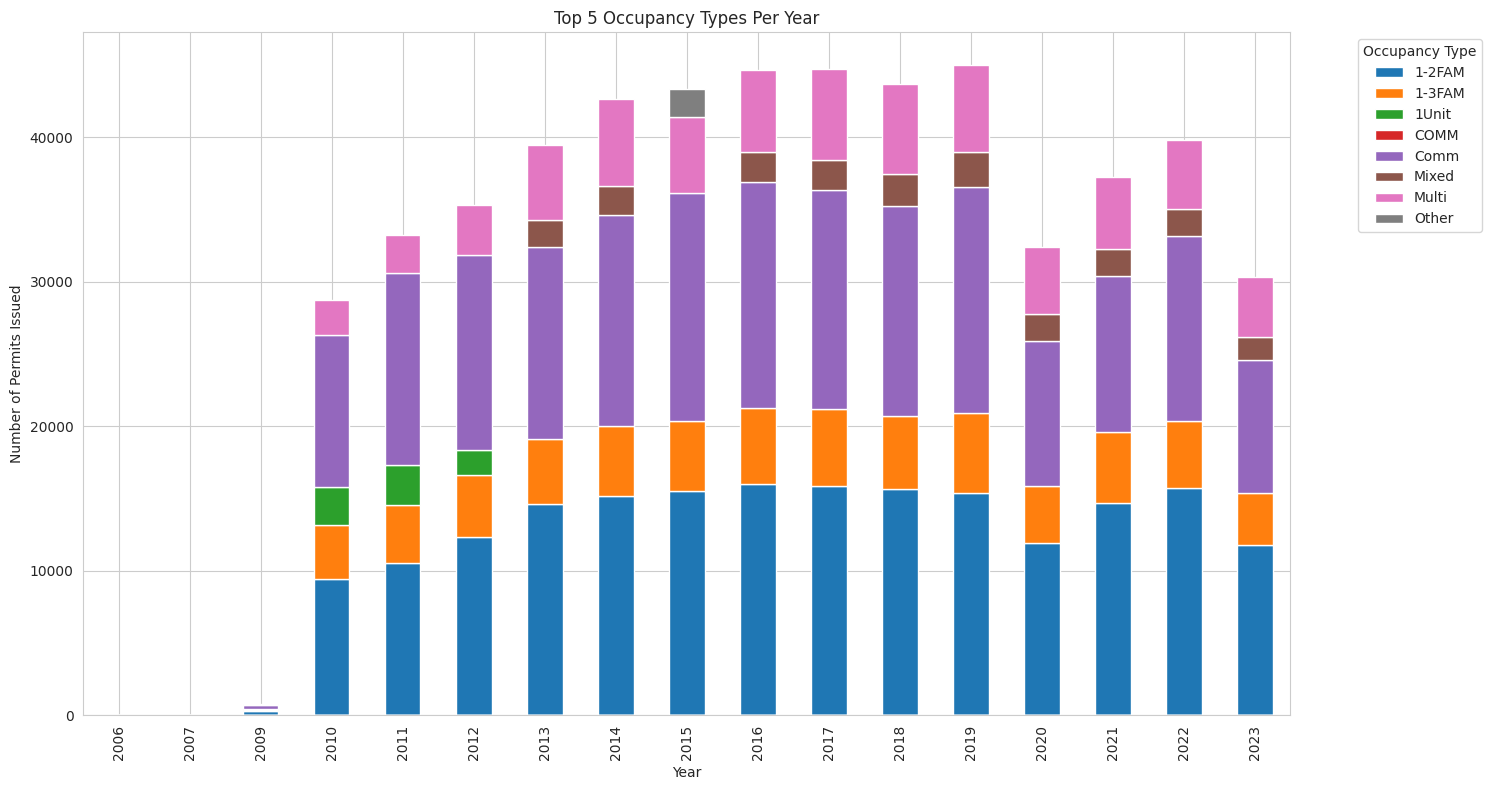

In [57]:
occupancy_trends = df.groupby(['issued_year', 'occupancytype']).size().reset_index(name='count')

top_occupancy_trends = occupancy_trends.groupby('issued_year').apply(lambda x: x.sort_values('count', ascending=False).head(5))

pivot_data = top_occupancy_trends.pivot(index='issued_year', columns='occupancytype', values='count').fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Top 5 Occupancy Types Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Permits Issued')
plt.legend(title='Occupancy Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


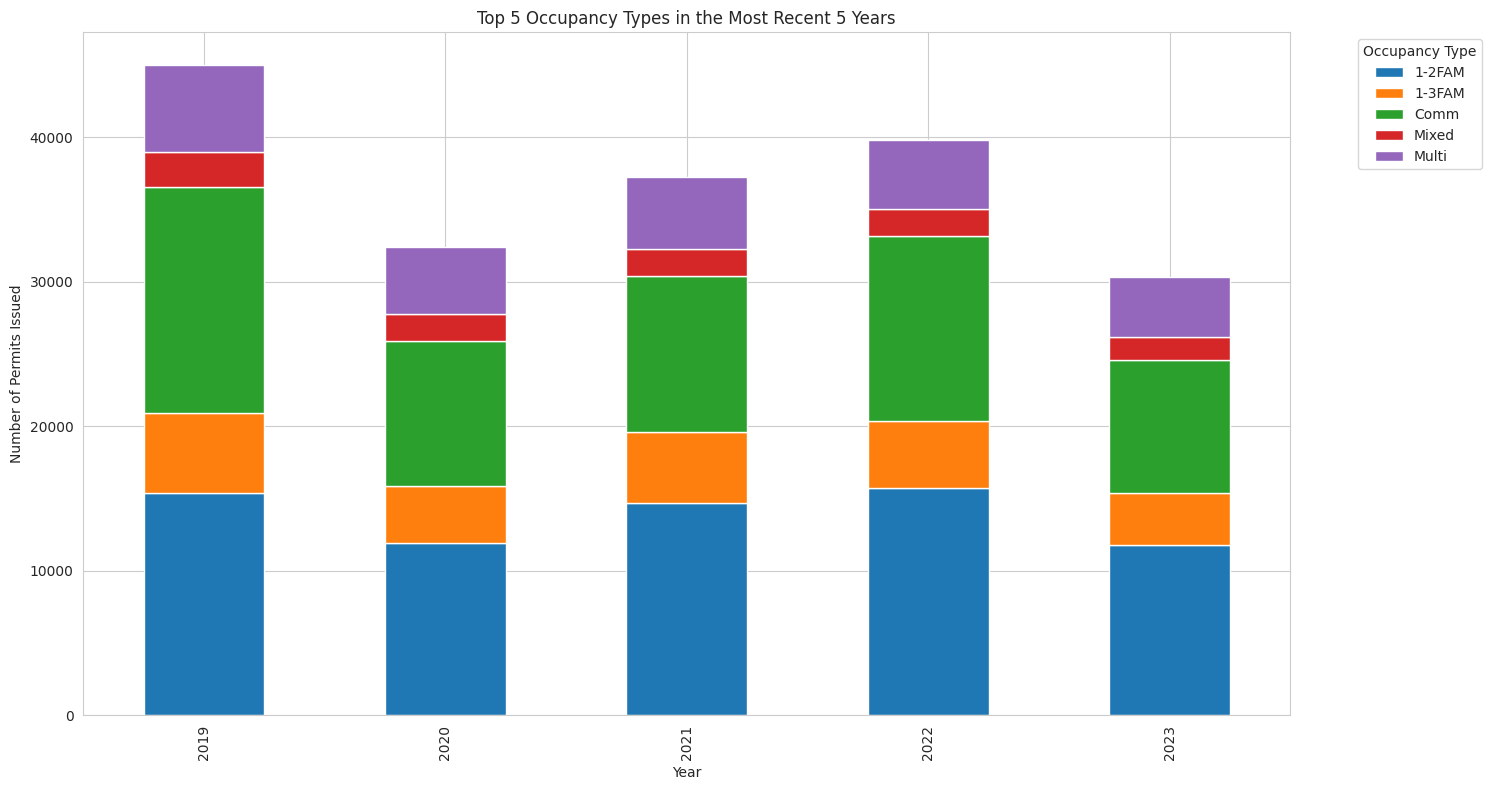

In [58]:

recent_5_years = df['issued_year'].unique()
recent_5_years.sort()
recent_5_years = recent_5_years[-5:]

filtered_top_occupancy = top_occupancy_trends[top_occupancy_trends['issued_year'].isin(recent_5_years)]

pivot_data = filtered_top_occupancy.pivot(index='issued_year', columns='occupancytype', values='count').fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Top 5 Occupancy Types in the Most Recent 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Permits Issued')
plt.legend(title='Occupancy Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Prelimitary Analysis With Respect the first two key questions

select columns for use

In [9]:
df_Q1 = df[['issued_date','worktype', 'description', 'declared_valuation', 'sq_feet', 'occupancytype']]
df_Q1.head()

,issued_date,worktype,description,declared_valuation,sq_feet,occupancytype
0,2021-01-28,INTEXT,Interior/Exterior Work,36500.00,0.0,Mixed
1,2011-11-04,COB,City of Boston,40000.00,170.0,Comm
2,2020-06-01,OTHER,Other,5000.00,0.0,1-3FAM
3,2019-11-13,INTEXT,Interior/Exterior Work,74295.75,0.0,Multi
4,2013-01-03,EXTREN,Renovations - Exterior,15000.00,0.0,1-2FAM


Create the year columns specifically for this analysis and select the columns

In [10]:
df_Q1 = df[['issued_date','worktype', 'description', 'declared_valuation', 'sq_feet', 'occupancytype']]
df_Q1['issued_date'] = pd.to_datetime(df_Q1['issued_date'])
df_Q1['issued_year']= df_Q1['issued_date'].dt.year
df_Q1 = df_Q1[['issued_year','worktype', 'description', 'declared_valuation', 'sq_feet', 'occupancytype']]
df_Q1.head()

<ipython-input-10-eef1d8ff18dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q1['issued_date'] = pd.to_datetime(df_Q1['issued_date'])
<ipython-input-10-eef1d8ff18dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q1['issued_year']= df_Q1['issued_date'].dt.year


,issued_year,worktype,description,declared_valuation,sq_feet,occupancytype
0,2021,INTEXT,Interior/Exterior Work,36500.00,0.0,Mixed
1,2011,COB,City of Boston,40000.00,170.0,Comm
2,2020,OTHER,Other,5000.00,0.0,1-3FAM
3,2019,INTEXT,Interior/Exterior Work,74295.75,0.0,Multi
4,2013,EXTREN,Renovations - Exterior,15000.00,0.0,1-2FAM


Group by and turn the value within the cateogrical data of worktype into a spreaded form and count each work type

In [11]:
result_worktype = df_Q1.groupby('issued_year')['worktype'].agg(lambda x: x.value_counts().to_dict())
worktype_result = result_worktype.reset_index()
expanded_categories = pd.DataFrame.from_records(worktype_result['worktype'])
worktype_result = pd.concat([worktype_result, expanded_categories], axis=1)

In [12]:
worktype_result = worktype_result.drop('worktype', axis=1)
worktype_result

,issued_year,CONVRT,ELECTRICAL,GAS,PLUMBING,INTREN,OTHER,INTEXT,ROOF,SRVCHG,...,BFCHMDECMA,BFCHMTEMPE,BFCHMMATTR,Dumpsters,Staging,SpeEvents,Repair,Capital,PVTEMER,New
0,2006,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,2.0,217.0,173.0,152.0,144.0,61.0,45.0,28.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,75.0,7426.0,4211.0,5232.0,3586.0,1522.0,1971.0,1382.0,970.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,1.0,8921.0,4174.0,5724.0,3685.0,1680.0,1936.0,1181.0,323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012,7.0,8766.0,4421.0,6008.0,3537.0,1517.0,2295.0,1121.0,218.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
6,2013,652.0,9257.0,4357.0,5830.0,3701.0,1402.0,2472.0,1423.0,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014,4.0,10628.0,4912.0,6351.0,4103.0,1411.0,2599.0,1300.0,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1.0,9683.0,4308.0,6074.0,4116.0,1408.0,3164.0,1913.0,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.0,71.0,NaN
9,2016,NaN,10285.0,4497.0,6540.0,4567.0,1753.0,2608.0,1583.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.0,26.0,1.0


In [13]:
worktype_result.set_index('issued_year', inplace=True)

Separate into two groups for better visualization

In [14]:
selected_worktype500 = worktype_result.loc[:, worktype_result.mean() <= 500]
selected_worktypeAbove = worktype_result.loc[:, worktype_result.mean() > 500]

In [15]:
selected_worktype500
selected_worktypeAbove

,ELECTRICAL,GAS,PLUMBING,INTREN,OTHER,INTEXT,ROOF,FA,LVOLT,EXTREN,INTDEM,FSTTRK,CHGOCC,INSUL,SOL,Main,Service
issued_year,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,217.0,173.0,152.0,144.0,61.0,45.0,28.0,20.0,20.0,18.0,14.0,12.0,2.0,1.0,NaN,NaN,NaN
2010,7426.0,4211.0,5232.0,3586.0,1522.0,1971.0,1382.0,1150.0,1561.0,1561.0,508.0,404.0,325.0,371.0,9.0,NaN,NaN
2011,8921.0,4174.0,5724.0,3685.0,1680.0,1936.0,1181.0,1809.0,2454.0,1561.0,554.0,511.0,478.0,996.0,106.0,NaN,NaN
2012,8766.0,4421.0,6008.0,3537.0,1517.0,2295.0,1121.0,2021.0,3397.0,1707.0,544.0,651.0,545.0,947.0,518.0,7.0,5.0
2013,9257.0,4357.0,5830.0,3701.0,1402.0,2472.0,1423.0,2128.0,3291.0,1650.0,554.0,768.0,707.0,680.0,524.0,NaN,NaN
2014,10628.0,4912.0,6351.0,4103.0,1411.0,2599.0,1300.0,2307.0,3651.0,1674.0,638.0,1018.0,887.0,620.0,904.0,NaN,NaN
2015,9683.0,4308.0,6074.0,4116.0,1408.0,3164.0,1913.0,2362.0,3737.0,1782.0,722.0,1125.0,880.0,549.0,1405.0,631.0,636.0


line chart for the two groups

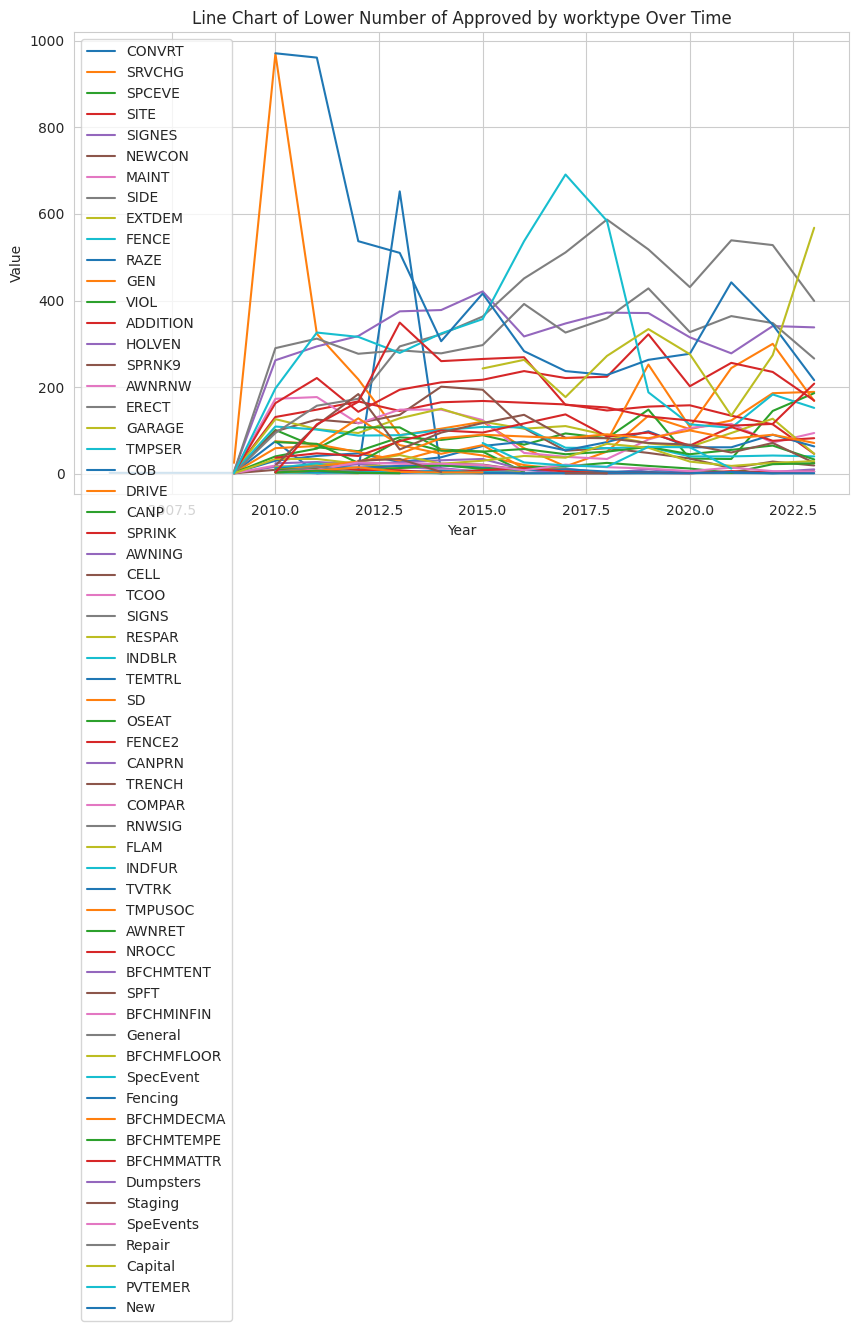

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for column in selected_worktype500.columns:
    plt.plot(selected_worktype500.index, selected_worktype500[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Chart of Lower Number of Approved by worktype Over Time')
plt.legend()
plt.grid(True)

plt.show()

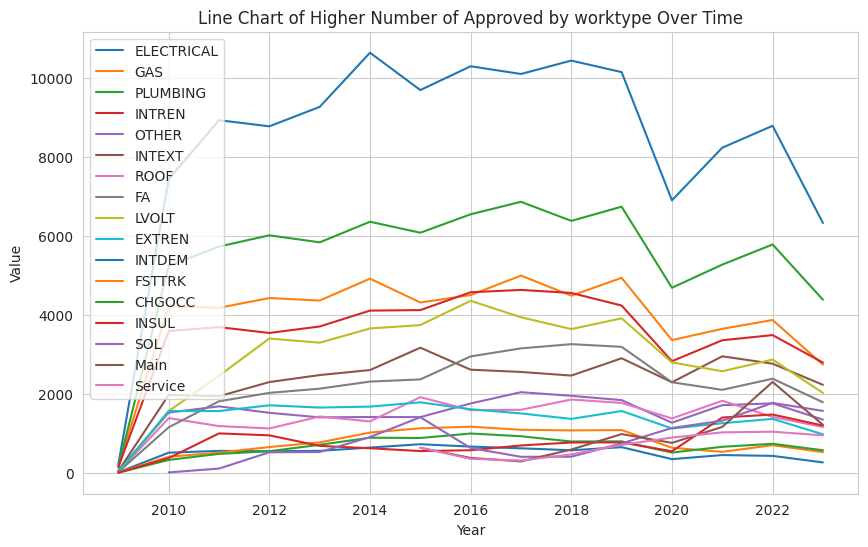

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for column in selected_worktypeAbove.columns:
    plt.plot(selected_worktypeAbove.index, selected_worktypeAbove[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Chart of Higher Number of Approved by worktype Over Time')
plt.legend()
plt.grid(True)

plt.show()

Same goes to description and occupancy type

In [ ]:
#'description', 'declared_valuation', 'sq_feet', 'occupancytype'

result_description = df_Q1.groupby('issued_year')['description'].agg(lambda x: x.value_counts().to_dict())
description_result = result_description.reset_index()
expanded_description = pd.DataFrame.from_records(description_result['description'])
description_result = pd.concat([description_result, expanded_description], axis=1)

In [ ]:
description_result = description_result.drop('description', axis=1)
description_result.set_index('issued_year', inplace=True)
description_result.describe()

,From TimeMatters-PZ Conversion,Electrical,Gas,Plumbing,Renovations - Interior NSC,Other,Interior/Exterior Work,Roofing,Service Change,Low Voltage,...,Fencing,Repair,Installation/Evaluation of Mat,Dumpsters,Installation of Decorative Mat,Staging,Temporary Enclosures,Capital Improvement,Prinvate Contractor-Emergency,New
count,10.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.000000,7.000000,1.0
mean,74.40000,8413.533333,3940.600000,5469.933333,3556.733333,1512.600000,2351.800000,1396.933333,181.000000,2948.600000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,284.666667,38.142857,1.0
std,202.82954,2610.011244,1202.334087,1630.602757,1101.689642,461.027703,723.146517,456.126309,232.534176,1117.015974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.403660,25.360261,NaN
min,1.00000,217.000000,173.000000,152.000000,144.000000,61.000000,45.000000,28.000000,17.000000,20.000000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,134.000000,12.000000,1.0
25%,2.00000,7825.500000,3753.500000,5249.500000,3418.000000,1405.000000,2286.500000,1249.500000,74.000000,2511.500000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,243.000000,17.500000,1.0
50%,2.00000,8921.000000,4308.000000,5830.000000,3685.000000,1522.000000,2472.000000,1413.000000,120.000000,3291.000000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,272.000000,26.000000,1.0
75%,6.25000,10113.500000,4489.000000,6361.500000,4173.500000,1755.000000,2684.000000,1680.500000,189.500000,3694.000000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,276.000000,61.500000,1.0
max,648.00000,10628.000000,4989.000000,6856.000000,4626.000000,2039.000000,3164.000000,1913.000000,970.000000,4351.000000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,589.000000,71.000000,1.0


In [ ]:
selected_description500 = description_result.loc[:, (description_result.mean() >= 200 ) & (description_result.mean() <= 300 )]
selected_descriptionAbove = description_result.loc[:, description_result.mean() > 500]


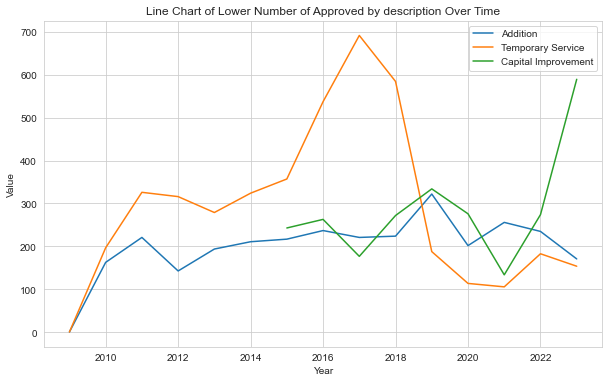

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for column in selected_description500.columns:
    plt.plot(selected_description500.index, selected_description500[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Chart of Lower Number of Approved by description Over Time')
plt.legend()
plt.grid(True)

plt.show()

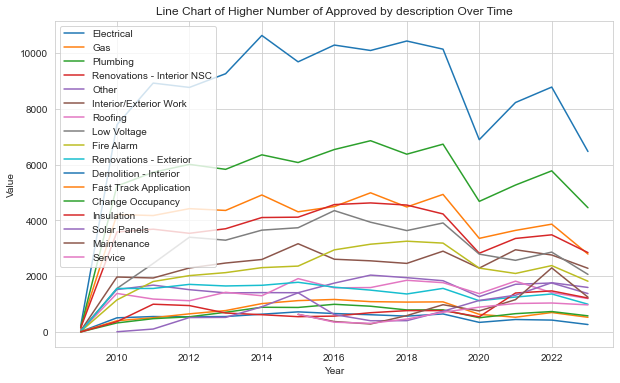

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for column in selected_descriptionAbove.columns:
    plt.plot(selected_descriptionAbove.index, selected_descriptionAbove[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Chart of Higher Number of Approved by description Over Time')
plt.legend()
plt.grid(True)

plt.show()

The declared valuation calculates the average for each year and plot the line chart

In [ ]:
df_Q1.head()
df_Q1['declared_valuation'] = pd.to_numeric(df_Q1['declared_valuation'], errors='coerce')

<Figure size 720x432 with 0 Axes>

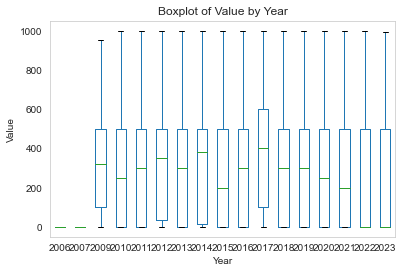

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
df_Q1.boxplot(column='declared_valuation', by='issued_year', grid=False)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Boxplot of Value by Year')
plt.suptitle('')  # Remove the automatically generated title
plt.show()

In [ ]:
#'description', 'declared_valuation', 'sq_feet', 'occupancytype'
result_declared_valuation = df_Q1.groupby('issued_year')['declared_valuation'].agg(lambda x: x.value_counts().to_dict())
declared_valuation_result = result_declared_valuation.reset_index()
expanded_declared_valuation = pd.DataFrame.from_records(declared_valuation_result['declared_valuation'])
declared_valuation_result = pd.concat([declared_valuation_result, expanded_declared_valuation], axis=1)

In [ ]:
declared_valuation_result = declared_valuation_result.drop('declared_valuation', axis=1)
declared_valuation_result.head()

,issued_year,0.0,500.0,300.0,600.0,100.0,200.0,250.0,400.0,1.0,...,57.5,32.4,472.95,635.97,696.72,268.09,994.25,38.0,499.25,875.5
0,2006,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,34,59.0,22.0,18.0,16.0,13.0,12.0,9.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,2333,1351.0,461.0,249.0,380.0,389.0,168.0,242.0,279.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,2439,1666.0,645.0,305.0,383.0,435.0,196.0,421.0,208.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_Q1.head()

,issued_year,worktype,description,declared_valuation,sq_feet,occupancytype
0,2021,INTEXT,Interior/Exterior Work,NaN,0.0,Mixed
1,2011,COB,City of Boston,NaN,170.0,Comm
2,2020,OTHER,Other,NaN,0.0,1-3FAM
3,2019,INTEXT,Interior/Exterior Work,NaN,0.0,Multi
4,2013,EXTREN,Renovations - Exterior,NaN,0.0,1-2FAM


In [ ]:
#df_Q1_numdroped = df_Q1.dropna()
avg_valuation_per_year = df_Q1.groupby('issued_year')['declared_valuation'].mean().reset_index()

In [ ]:
avg_valuation_per_year

,issued_year,declared_valuation
0,2006,0.000000
1,2007,0.000000
2,2009,352.531381
3,2010,295.090486
4,2011,322.277788
5,2012,344.855512
6,2013,312.110978
7,2014,343.146543
8,2015,281.655078
9,2016,333.327240


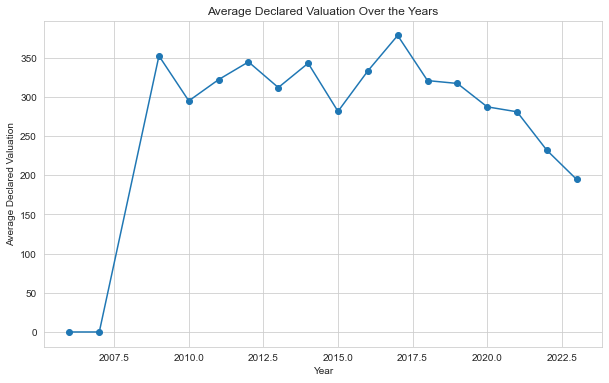

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(avg_valuation_per_year['issued_year'], avg_valuation_per_year['declared_valuation'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Declared Valuation')
plt.title('Average Declared Valuation Over the Years')
plt.grid(True)

In [ ]:
df_Q1['sq_feet'] = pd.to_numeric(df['sq_feet'], errors='coerce')
avg_sqft_per_year = df_Q1.groupby('issued_year')['sq_feet'].mean().reset_index()
avg_sqft_per_year

,issued_year,sq_feet
0,2006,0.000000
1,2007,0.000000
2,2009,2304.638497
3,2010,4614.826590
4,2011,245505.621013
5,2012,3694.776727
6,2013,5699.328648
7,2014,3234.337895
8,2015,633.661458
9,2016,488.220204


In [ ]:
selected_rows = df_Q1[df_Q1['issued_year'] == 2011]
selected_rows

,issued_year,worktype,description,declared_valuation,sq_feet,occupancytype
1,2011,COB,City of Boston,NaN,170.0,Comm
41,2011,INTEXT,Interior/Exterior Work,NaN,1950.0,1-2FAM
44,2011,EXTREN,Renovations - Exterior,600.0,0.0,1-2FAM
45,2011,EXTREN,Renovations - Exterior,600.0,0.0,1-2FAM
84,2011,COB,City of Boston,NaN,0.0,Multi
...,...,...,...,...,...,...
622969,2011,DRIVE,Driveway Installation,NaN,0.0,7More
622970,2011,DRIVE,Driveway Installation,NaN,0.0,7More
623002,2011,DRIVE,Driveway Installation,NaN,320.0,1-2FAM
623010,2011,OTHER,Other,0.0,0.0,Comm


In [ ]:
Q1 = selected_rows['sq_feet'].quantile(0.25)
Q3 = selected_rows['sq_feet'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = selected_rows[(selected_rows['sq_feet'] < lower_bound) | (selected_rows['sq_feet'] > upper_bound)]
print(outliers)

        issued_year worktype             description  declared_valuation  \
1              2011      COB          City of Boston                 NaN   
41             2011   INTEXT  Interior/Exterior Work                 NaN   
85             2011    OTHER                   Other                 0.0   
98             2011    OTHER                   Other                 NaN   
106            2011    OTHER                   Other                 0.0   
...             ...      ...                     ...                 ...   
622660         2011    OSEAT         Outside Seating                 NaN   
622776         2011    DRIVE   Driveway Installation                 NaN   
622790         2011    DRIVE   Driveway Installation                 NaN   
622966         2011    OSEAT         Outside Seating                 0.0   
623002         2011    DRIVE   Driveway Installation                 NaN   

        sq_feet occupancytype  
1         170.0          Comm  
41       1950.0        

In [ ]:
selected_rows['sq_feet'].mean()

245505.62101348408

In [ ]:
sorted_df = selected_rows.sort_values(by='sq_feet', ascending=False)

In [ ]:
sorted_df

,issued_year,worktype,description,declared_valuation,sq_feet,occupancytype
573703,2011,INTREN,Renovations - Interior NSC,NaN,1.000000e+10,Comm
188630,2011,MAINT,Annual Maintenance,1.0,2.000000e+06,Other
574240,2011,OTHER,Other,600.0,1.200000e+06,Comm
355619,2011,GAS,Gas,NaN,1.200000e+06,7More
457468,2011,TMPSER,Temporary Service,250.0,1.200000e+06,Comm
...,...,...,...,...,...,...
314306,2011,GAS,Gas,NaN,0.000000e+00,1-2FAM
314298,2011,GAS,Gas,0.0,0.000000e+00,1-4FAM
163894,2011,ELECTRICAL,Electrical,NaN,0.000000e+00,1-2FAM
163905,2011,COB,City of Boston,NaN,0.000000e+00,Other


In [ ]:
no_outlier = df_Q1[df_Q1['sq_feet'] < 100000]
avg_sqft_per_year_adjusted = no_outlier.groupby('issued_year')['sq_feet'].mean().reset_index()
avg_sqft_per_year_adjusted

,issued_year,sq_feet
0,2006,0.000000
1,2007,0.000000
2,2009,785.527915
3,2010,1126.791802
4,2011,1195.400480
5,2012,1280.988860
6,2013,1382.743390
7,2014,1193.247524
8,2015,289.177113
9,2016,142.819870


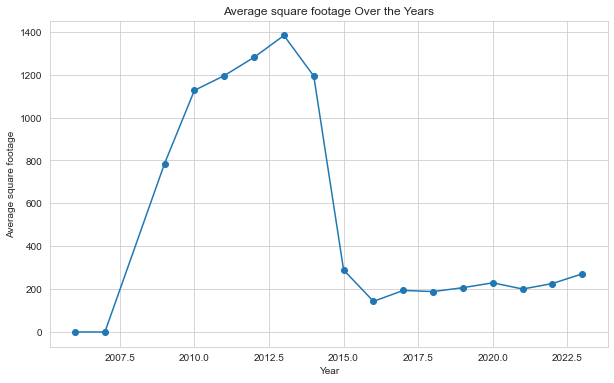

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(avg_sqft_per_year_adjusted['issued_year'], avg_sqft_per_year_adjusted['sq_feet'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average square footage')
plt.title('Average square footage Over the Years')
plt.grid(True)

<Figure size 720x432 with 0 Axes>

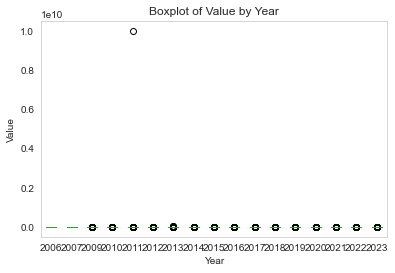

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
df_Q1.boxplot(column='sq_feet', by='issued_year', grid=False)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Boxplot of Value by Year')
plt.suptitle('')  # Remove the automatically generated title
plt.show()

<Figure size 720x432 with 0 Axes>

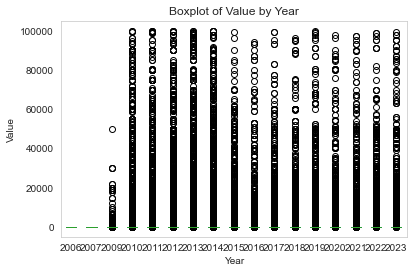

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
no_outlier.boxplot(column='sq_feet', by='issued_year', grid=False)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Boxplot of Value by Year')
plt.suptitle('')  # Remove the automatically generated title
plt.show()

In [ ]:
result_occupancytype = df_Q1.groupby('issued_year')['occupancytype'].agg(lambda x: x.value_counts().to_dict())
occupancytype_result = result_occupancytype.reset_index()
expanded_occupancytype = pd.DataFrame.from_records(occupancytype_result['occupancytype'])
occupancytype_result = pd.concat([occupancytype_result, expanded_occupancytype], axis=1)


In [ ]:
occupancytype_result = occupancytype_result.drop('occupancytype', axis=1)
occupancytype_result.set_index('issued_year', inplace=True)


In [ ]:
occupancytype_result500 = occupancytype_result.loc[:, occupancytype_result.mean() <= 500]
occupancytype_resultAbove = occupancytype_result.loc[:, occupancytype_result.mean() > 500]

In [ ]:
occupancytype_result500

,COMM,1-7FAM,7More,3unit,2unit,VacLd,6unit,4unit,6Unit,7unit,5unit,4Unit,MIXED
issued_year,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,2.0,41.0,38.0,15.0,8.0,3.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN
2010,3.0,1004.0,1868.0,369.0,369.0,399.0,127.0,146.0,NaN,40.0,137.0,NaN,NaN
2011,1.0,901.0,2058.0,251.0,157.0,335.0,107.0,177.0,NaN,28.0,123.0,NaN,NaN
2012,NaN,496.0,1399.0,158.0,108.0,258.0,105.0,112.0,NaN,14.0,82.0,NaN,NaN
2013,185.0,11.0,23.0,3.0,4.0,366.0,1.0,6.0,2.0,1.0,NaN,9.0,2.0
2014,NaN,6.0,11.0,4.0,NaN,613.0,2.0,2.0,NaN,NaN,3.0,NaN,NaN
2015,NaN,5.0,4.0,NaN,1.0,293.0,NaN,1.0,NaN,NaN,3.0,NaN,NaN


In [ ]:
occupancytype_resultAbove

,1-3FAM,1-2FAM,Comm,1Unit,Mixed,Multi,Other,1-4FAM
issued_year,,,,,,,,
2006,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,114.0,296.0,295.0,47.0,45.0,31.0,31.0,19.0
2010,3732.0,9415.0,10514.0,2672.0,1073.0,2389.0,1329.0,1046.0
2011,3979.0,10571.0,13318.0,2761.0,1266.0,2604.0,1325.0,1018.0
2012,4227.0,12383.0,13460.0,1784.0,1560.0,3473.0,1608.0,1131.0
2013,4555.0,14610.0,13223.0,12.0,1869.0,5233.0,1841.0,1323.0
2014,4828.0,15186.0,14587.0,10.0,2062.0,6025.0,1834.0,1546.0
2015,4841.0,15563.0,15741.0,1.0,1933.0,5251.0,1936.0,1691.0


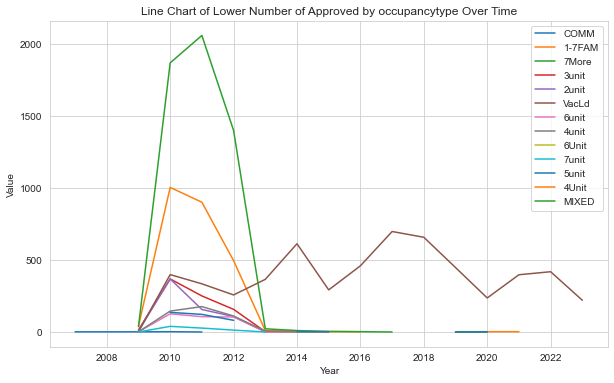

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for column in occupancytype_result500.columns:
    plt.plot(occupancytype_result500.index, occupancytype_result500[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Chart of Lower Number of Approved by occupancytype Over Time')
plt.legend()
plt.grid(True)

plt.show()

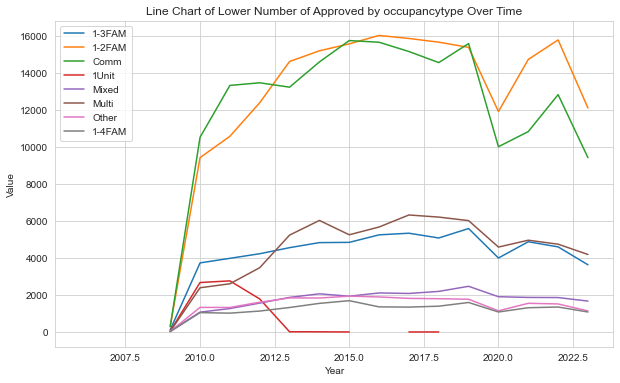

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for column in occupancytype_resultAbove.columns:
    plt.plot(occupancytype_resultAbove.index, occupancytype_resultAbove[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Chart of Lower Number of Approved by occupancytype Over Time')
plt.legend()
plt.grid(True)

plt.show()